# Neural Network implementation project

## Imporing required libraries

In [525]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## loading dataset

In [526]:
def load_dataset(dataset):
    df = pd.read_csv(dataset)
    X = df.drop('target', axis=1)
    y = df.get('target')
    #X = (X-X.mean())/X.std()
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.7)
    X_train = X_train.T
    y_train = y_train.values.reshape(1,y_train.values.shape[0])
    X_test = X_test.T
    y_test = y_test.values.reshape(1,y_test.values.shape[0])
    
    return X_train,y_train,X_test,y_test

In [527]:
X_train,y_train,X_test,y_test = load_dataset("heart.csv")

In [528]:
X_train

,137,106,284,44,139,247,288,156,297,252,...,242,277,211,9,195,251,192,117,47,172
age,62.0,69.0,61.0,39.0,64.0,66.0,57.0,47.0,59.0,62.0,...,64.0,57.0,61.0,57.0,59.0,43.0,54.0,56.0,47.0,58.0
sex,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
cp,1.0,3.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,3.0,2.0,1.0
trestbps,128.0,160.0,140.0,140.0,128.0,160.0,110.0,130.0,164.0,138.0,...,145.0,124.0,120.0,150.0,170.0,132.0,120.0,120.0,138.0,120.0
chol,208.0,234.0,207.0,321.0,263.0,246.0,335.0,253.0,176.0,294.0,...,212.0,261.0,260.0,168.0,326.0,247.0,188.0,193.0,257.0,284.0
fbs,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
restecg,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
thalach,140.0,131.0,138.0,182.0,105.0,120.0,143.0,179.0,90.0,106.0,...,132.0,141.0,140.0,174.0,140.0,143.0,113.0,162.0,156.0,160.0
exang,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
oldpeak,0.0,0.1,1.9,0.0,0.2,0.0,3.0,0.0,1.0,1.9,...,2.0,0.3,3.6,1.6,3.4,0.1,1.4,1.9,0.0,1.8


## Initializing Parameters

In [529]:
def initialize_parameters(layer_dims):
    np.random.seed(0)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
    return parameters

## Forward propagation

In [530]:
def forward_propagation(X,parameters):
    linear = {}
    activations = {}
    activations["A0"] = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = activations["A"+str(l-1)]
        linear["Z"+str(l)] = np.dot(parameters["W"+str(l)],A_prev)+parameters["b"+str(l)]
        activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
    A_prev = activations["A"+str(L-1)]
    linear["Z"+str(L)] = np.dot(parameters["W"+str(L)],A_prev)+parameters["b"+str(L)]
    activations["A"+str(L)] = 1/(1+np.exp(-linear["Z"+str(L)]))
    return linear,activations

## Computing Cost function

In [531]:
def compute_cost(AL,Y):
    
    m = Y.shape[1]
    cost = -np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))/m
    
    return cost

## Backward propagation

In [532]:
def backward_propagation(AL, Y, linear,activations,parameters):
    grads = {}
    L = len(linear)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    grads["dZ"+str(L)] = AL-Y
    grads["dW" + str(L)] = np.dot(grads["dZ"+str(L)],activations["A"+str(L-1)].T)/m
    grads["db" + str(L)] = np.sum(grads["dZ"+str(L)],axis=1, keepdims=True)/m
    for l in reversed(range(L-1)):
        s = 1/(1+np.exp(-linear["Z"+str(l+1)]))
        grads["dZ"+str(l+1)] = np.dot(parameters['W'+str(l+2)].T,grads["dZ"+str(l+2)])*s*(1-s)
        grads["dW" + str(l + 1)] = np.dot(grads["dZ"+str(l+1)],activations["A"+str(l)].T)/m
        grads["db" + str(l + 1)] = np.sum(grads["dZ"+str(l+1)],axis=1, keepdims=True)/m
    return grads

## Updating the parameters

In [533]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2
    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db" + str(l+1)]
        
    return parameters

## Optimization function

In [534]:
def optimize(X, Y, layers_dims, learning_rate, num_iterations = 2500, print_cost=False,model_name = "Neural Network"):

    np.random.seed(1)
    costs = []
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):
        
        linear,activations = forward_propagation(X_train,parameters)
        L = len(parameters) // 2
        grads = backward_propagation(activations["A"+str(L)],Y,linear,activations,parameters)
        cost = compute_cost(activations["A"+str(L)],Y)
        parameters = update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    print ("Cost after iteration %i: %f" %(i, cost))
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title(model_name+" at Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters,costs

Cost after iteration 0: 0.848451
Cost after iteration 1000: 0.624181
Cost after iteration 2000: 0.615142
Cost after iteration 3000: 0.582956
Cost after iteration 4000: 0.572327
Cost after iteration 5000: 0.557519
Cost after iteration 6000: 0.558790
Cost after iteration 7000: 0.564427
Cost after iteration 7499: 0.538120


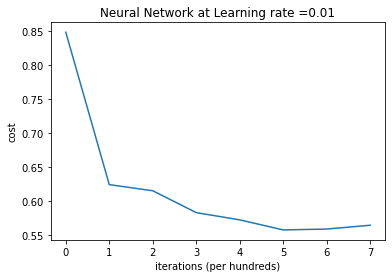

In [535]:
parameters,costs = optimize(X_train, y_train, [X_train.shape[0],20,20,1], learning_rate = 0.01, num_iterations = 7500, print_cost=True)

In [536]:
parameters["W3"].shape

(1, 20)

In [537]:
linear,activations = forward_propagation(X_test[225].values.reshape(13,1),parameters)
activations["A3"].shape

(1, 1)

Cost after iteration 0: 0.785711
Cost after iteration 1000: 0.688981
Cost after iteration 2000: 0.686398
Cost after iteration 3000: 0.684125
Cost after iteration 4000: 0.682050
Cost after iteration 5000: 0.680088
Cost after iteration 6000: 0.678134
Cost after iteration 7000: 0.676118
Cost after iteration 7499: 0.675063


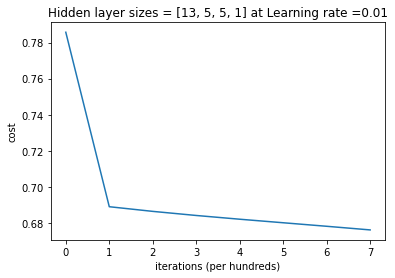

Cost after iteration 0: 0.659518
Cost after iteration 1000: 0.638719
Cost after iteration 2000: 0.629312
Cost after iteration 3000: 0.622637
Cost after iteration 4000: 0.614797
Cost after iteration 5000: 0.607766
Cost after iteration 6000: 0.604053
Cost after iteration 7000: 0.598478
Cost after iteration 7499: 0.594283


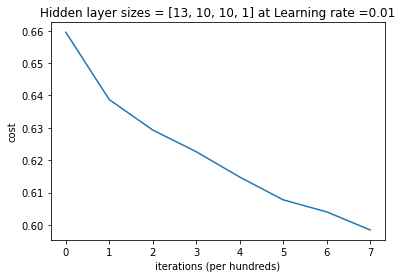

Cost after iteration 0: 0.848451
Cost after iteration 1000: 0.624181
Cost after iteration 2000: 0.615142
Cost after iteration 3000: 0.582956
Cost after iteration 4000: 0.572327
Cost after iteration 5000: 0.557519
Cost after iteration 6000: 0.558790
Cost after iteration 7000: 0.564427
Cost after iteration 7499: 0.538120


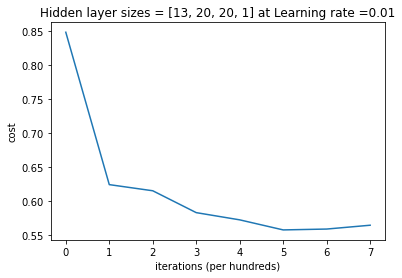

<ipython-input-530-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-532-0403e10d6e1b>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


Cost after iteration 0: 0.783057
Cost after iteration 1000: 0.615839
Cost after iteration 2000: 0.597179
Cost after iteration 3000: 0.584161
Cost after iteration 4000: 0.577238
Cost after iteration 5000: 0.554511
Cost after iteration 6000: 0.539710
Cost after iteration 7000: 0.531264
Cost after iteration 7499: 0.526123


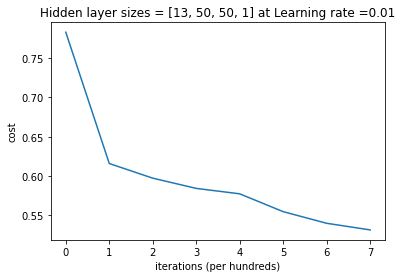

<ipython-input-530-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-532-0403e10d6e1b>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


Cost after iteration 0: 2.841881
Cost after iteration 1000: 0.552919
Cost after iteration 2000: 0.531090
Cost after iteration 3000: 0.518165
Cost after iteration 4000: 0.506892
Cost after iteration 5000: 0.496541
Cost after iteration 6000: 0.482919
Cost after iteration 7000: 0.473967
Cost after iteration 7499: 0.470241


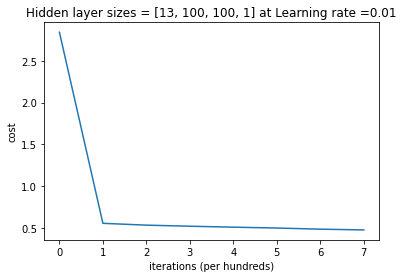

<ipython-input-530-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-532-0403e10d6e1b>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


Cost after iteration 0: 2.078157
Cost after iteration 1000: 0.491781
Cost after iteration 2000: 0.461662
Cost after iteration 3000: 0.435212
Cost after iteration 4000: 0.431765
Cost after iteration 5000: 0.403324
Cost after iteration 6000: 0.389567
Cost after iteration 7000: 0.380147
Cost after iteration 7499: 0.354167


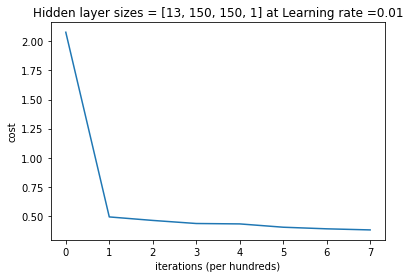

<ipython-input-530-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-532-0403e10d6e1b>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


Cost after iteration 0: 1.848325
Cost after iteration 1000: 0.454718
Cost after iteration 2000: 0.419871
Cost after iteration 3000: 0.398380
Cost after iteration 4000: 0.381187
Cost after iteration 5000: 0.368452
Cost after iteration 6000: 0.352387
Cost after iteration 7000: 0.342581
Cost after iteration 7499: 0.344341


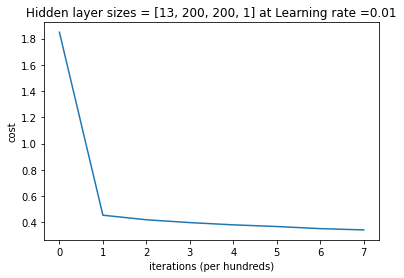

<ipython-input-530-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-532-0403e10d6e1b>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


Cost after iteration 0: 0.866593
Cost after iteration 1000: 0.390121
Cost after iteration 2000: 0.333906
Cost after iteration 3000: 0.303785
Cost after iteration 4000: 0.295752
Cost after iteration 5000: 0.276797
Cost after iteration 6000: 0.262181
Cost after iteration 7000: 0.251999
Cost after iteration 7499: 0.256737


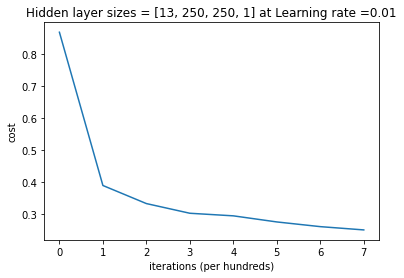

In [538]:
diff_hidden_layers_size = [[X_train.shape[0],5,5,1],[X_train.shape[0],10,10,1],
                           [X_train.shape[0],20,20,1],[X_train.shape[0],50,50,1],
                           [X_train.shape[0],100,100,1],[X_train.shape[0],150,150,1],
                           [X_train.shape[0],200,200,1],[X_train.shape[0],250,250,1]]

diff_hidden_layers_parameters = {}
diff_hidden_layers_costs = {}

for hidden_layer in diff_hidden_layers_size:
    model_name = "Hidden layer sizes = "+str(hidden_layer)
    parameters,cost = optimize(X_train, y_train, hidden_layer, learning_rate = 0.01, num_iterations = 7500, print_cost=True,model_name = model_name)
    diff_hidden_layers_parameters["NN"+str(hidden_layer)] = parameters
    diff_hidden_layers_costs["NN"+str(hidden_layer)] = cost

In [539]:
costs = []
for network in diff_hidden_layers_costs:
    costs.append(diff_hidden_layers_costs[network][-1])
costs

[0.6761183290157547,
 0.5984782889784523,
 0.5644267503775665,
 0.5312643998975565,
 0.4739669141535782,
 0.38014736359222373,
 0.34258101263947727,
 0.2519989078959054]

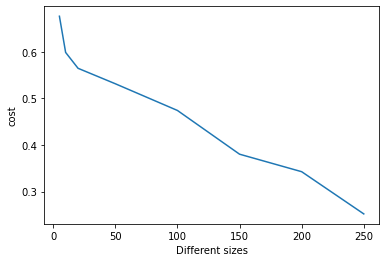

<Figure size 432x288 with 0 Axes>

In [540]:
plt.ylabel("cost")
plt.xlabel("Different sizes")
plt.plot([5,10,20,50,100,150,200,250],costs)
plt.show()
plt.savefig('cost.jpg')

## Using model for prediction

In [348]:
def model_predict(x,parameters):
    activations["A0"] = x
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = activations["A"+str(l-1)]
        linear["Z"+str(l)] = np.dot(parameters["W"+str(l)],A_prev)+parameters["b"+str(l)]
        activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
    linear["Z"+str(L)] = np.dot(parameters["W"+str(L)],activations["A"+str(l)])+parameters["b"+str(L)]
    #print(linear["Z"+str(L)].shape)
    y = 1/(1+np.exp(-linear["Z"+str(L)]))
    return y

In [349]:
def predict(x,parameters):
    y = model_predict(x,parameters)
    y[y>=0.5] = 1
    y[y<0.5] = 0
    return y

In [350]:
predictions = predict(X_train,diff_hidden_layers_parameters["NN[13, 250, 250, 1]"])
predictions = predictions.astype(int)
predictions

<ipython-input-348-37a51695f0e7>:7: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))


array([[1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1]])

## Accuracy scores of different size networks

In [351]:
diff_networks_accuracy_score_training_dataset = {}
for network in diff_hidden_layers_parameters:
    predictions = predict(X_train,diff_hidden_layers_parameters[network]).astype(int)
    test_score = y_train-predictions
    TPandTN = []
    for element in test_score.T:
        if element == 0:
            TPandTN.append(element)
    diff_networks_accuracy_score_training_dataset[network] = len(TPandTN)/y_train.shape[1]

<ipython-input-348-37a51695f0e7>:7: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))


In [352]:
diff_networks_accuracy_score_training_dataset

{'NN[13, 5, 5, 1]': 0.6273584905660378,
 'NN[13, 10, 10, 1]': 0.6981132075471698,
 'NN[13, 20, 20, 1]': 0.7264150943396226,
 'NN[13, 50, 50, 1]': 0.7216981132075472,
 'NN[13, 100, 100, 1]': 0.7547169811320755,
 'NN[13, 150, 150, 1]': 0.8160377358490566,
 'NN[13, 200, 200, 1]': 0.8632075471698113,
 'NN[13, 250, 250, 1]': 0.910377358490566}

In [353]:
diff_networks_accuracy_score_test_dataset = {}
for network in diff_hidden_layers_parameters:
    predictions = predict(X_test,diff_hidden_layers_parameters[network]).astype(int)
    test_score = y_test-predictions
    TPandTN = []
    for element in test_score.T:
        if element == 0:
            TPandTN.append(element)
    diff_networks_accuracy_score_test_dataset[network] = len(TPandTN)/y_train.shape[1]

<ipython-input-348-37a51695f0e7>:7: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))


In [354]:
diff_networks_accuracy_score_test_dataset

{'NN[13, 5, 5, 1]': 0.25471698113207547,
 'NN[13, 10, 10, 1]': 0.27358490566037735,
 'NN[13, 20, 20, 1]': 0.28773584905660377,
 'NN[13, 50, 50, 1]': 0.2688679245283019,
 'NN[13, 100, 100, 1]': 0.28773584905660377,
 'NN[13, 150, 150, 1]': 0.22641509433962265,
 'NN[13, 200, 200, 1]': 0.25,
 'NN[13, 250, 250, 1]': 0.2830188679245283}

In [355]:
import pickle

In [356]:
for network in diff_hidden_layers_parameters:
    filename = network
    outfile = open(filename,'wb')
    pickle.dump(diff_hidden_layers_parameters[network],outfile)
    outfile.close()

In [357]:
accuracies = []
for network in diff_networks_accuracy_score_training_dataset:
    accuracies.append(diff_networks_accuracy_score_training_dataset[network])
accuracies

[0.6273584905660378,
 0.6981132075471698,
 0.7264150943396226,
 0.7216981132075472,
 0.7547169811320755,
 0.8160377358490566,
 0.8632075471698113,
 0.910377358490566]

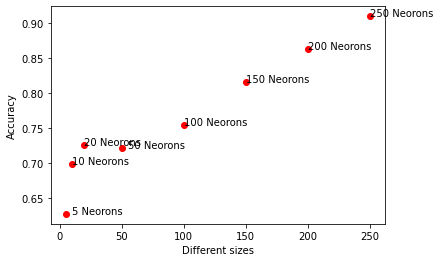

<Figure size 432x288 with 0 Axes>

In [358]:
#plt.axis([5,10,20,50,100,150,200,250])
plt.ylabel("Accuracy")
plt.xlabel("Different sizes")
plt.text(5+5,accuracies[0],"5 Neorons")
plt.text(10,accuracies[1],'10 Neorons')
plt.text(20,accuracies[2],'20 Neorons')
plt.text(50+5,accuracies[3],'50 Neorons')
plt.text(100,accuracies[4],'100 Neorons')
plt.text(150,accuracies[5],'150 Neorons')
plt.text(200,accuracies[6],'200 Neorons')
plt.text(250,accuracies[7],'250 Neorons')
plt.plot([5,10,20,50,100,150,200,250],accuracies,'ro')
plt.show()
plt.savefig('training.png')

In [359]:
test_accuracies = []
for network in diff_networks_accuracy_score_test_dataset:
    test_accuracies.append(diff_networks_accuracy_score_test_dataset[network])
test_accuracies

[0.25471698113207547,
 0.27358490566037735,
 0.28773584905660377,
 0.2688679245283019,
 0.28773584905660377,
 0.22641509433962265,
 0.25,
 0.2830188679245283]

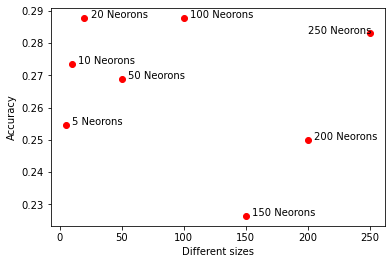

<Figure size 432x288 with 0 Axes>

In [360]:
plt.ylabel("Accuracy")
plt.xlabel("Different sizes")
plt.text(5+5,test_accuracies[0],"5 Neorons")
plt.text(10+5,test_accuracies[1],'10 Neorons')
plt.text(20+5,test_accuracies[2],'20 Neorons')
plt.text(50+5,test_accuracies[3],'50 Neorons')
plt.text(100+5,test_accuracies[4],'100 Neorons')
plt.text(150+5,test_accuracies[5],'150 Neorons')
plt.text(200+5,test_accuracies[6],'200 Neorons')
plt.text(250-50,test_accuracies[7],'250 Neorons')
plt.plot([5,10,20,50,100,150,200,250],test_accuracies,'ro')
plt.show()
plt.savefig('test.png')

In [361]:
from mpl_toolkits.mplot3d import Axes3D

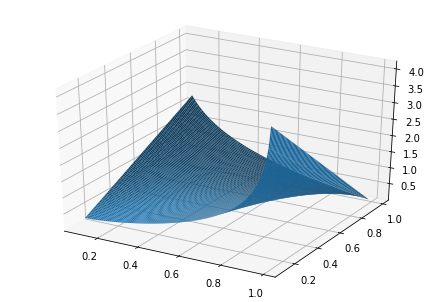

In [362]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(0.1,1,0.01)
Y = np.arange(0.1,1,0.01)
X,Y = np.meshgrid(X,Y)
def f(x,y):
    return -(y*np.log(x)+(1-y)*np.log(1-x))
ax.plot_surface(X,Y,f(X,Y), rstride=1, cstride=1)

In [420]:
def initialize_parameters_scipy(layer_dims):
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
    return parameters

In [421]:
parameters = initialize_parameters_scipy(shape)

In [422]:
def unroll_parameters(parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    return np.concatenate((W1.reshape(-1), b1.reshape(-1),W2.reshape(-1), b2.reshape(-1),W3.reshape(-1), b3.reshape(-1)))

In [423]:
def roll_parameters(parameters_vector,shape):
    parameters = {}
    W1_end = shape[0]*shape[1]
    b1_end = W1_end+shape[2]
    W2_end = b1_end+shape[1]*shape[2]
    b2_end = W2_end+shape[2]
    W3_end = b2_end+shape[2]*shape[3]
    b3_end = W3_end+shape[3]
    W1 = parameters_vector[0:W1_end].reshape(shape[1],shape[0])
    b1 = parameters_vector[W1_end:b1_end].reshape(shape[1],1)
    W2 = parameters_vector[b1_end:W2_end].reshape(shape[2],shape[1])
    b2 = parameters_vector[W2_end:b2_end].reshape(shape[2],1)
    W3 = parameters_vector[b2_end:W3_end].reshape(shape[3],shape[2])
    b3 = parameters_vector[W3_end:b3_end].reshape(shape[3],1)
    parameters["W1"] = W1
    parameters["W2"] = W2
    parameters["W3"] = W3
    parameters["b1"] = b1
    parameters["b2"] = b2
    parameters["b3"] = b3
    return parameters

In [424]:
def unroll_grads(grads):
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    dW3 = grads['dW3']
    db3 = grads['db3']
    return np.concatenate((dW1.reshape(-1), db1.reshape(-1),dW2.reshape(-1), db2.reshape(-1),dW3.reshape(-1), db3.reshape(-1)))

In [425]:
parameters_vector = unroll_parameters(parameters)

In [426]:
parameters_vector.shape

(11601,)

In [543]:
parameters = roll_parameters(parameters_vector,shape)

In [544]:
def compute_cost_single(AL,Y):
    
    cost = -(Y*np.log(AL)+(1-Y)*np.log(1-AL))
    
    return cost

In [545]:
def compute_cost_grads(parameters_vector,X,y,shape):
    parameters = roll_parameters(parameters_vector,shape)
    linear,activations = forward_propagation(X,parameters)
    L = len(parameters) // 2
    grads = backward_propagation(activations["A"+str(L)],y,linear,activations,parameters)
    cost = round(compute_cost(activations["A"+str(L)],y),5)
    parameters = unroll_parameters
    return cost,grads

In [546]:
def cost(parameters_vector,X,y,shape):
    cost,_ = compute_cost_grads(parameters_vector,X,y,shape)
    return cost

In [547]:
def grads(parameters_vector,X,y,shape):
    _,grads_dict = compute_cost_grads(parameters_vector,X,y,shape)
    grads = unroll_grads(grads_dict)
    return grads

In [548]:
from scipy import optimize

In [585]:
X = X_train
y = y_train
shape = [13,250,250,1]
init_values = unroll_parameters(initialize_parameters(shape))*0.5
result = optimize.fmin_cg(cost, init_values ,fprime = grads, maxiter=7500, args = (X,y,shape))
diff_hidden_layers_parameters_scipy["NN"+str(shape)] = roll_parameters(result,shape)
result

<ipython-input-530-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-532-0403e10d6e1b>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


         Current function value: 0.208120
         Iterations: 674
         Function evaluations: 1239
         Gradient evaluations: 1227


<ipython-input-530-cb5a10bd4c84>:9: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
<ipython-input-532-0403e10d6e1b>:10: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-linear["Z"+str(l+1)]))


array([ 0.88202617,  0.2000786 ,  0.48936899, ..., -0.14812497,
       -0.91779601,  0.00819223])

In [595]:
scipy_costs = [0.669900,0.457060,0.447760,0.340390,0.315110,0.304910,0.247480,0.208120]

In [596]:
diff_hidden_layers_parameters['NN[13, 250, 250, 1]']['W1'].shape

(250, 13)

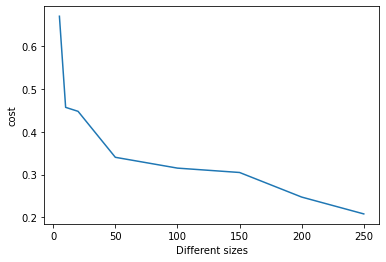

In [597]:
plt.ylabel("cost")
plt.xlabel("Different sizes")
plt.plot([5,10,20,50,100,150,200,250],scipy_costs)
plt.show()

In [586]:
diff_networks_accuracy_score_training_dataset_scipy = {}
for network in diff_hidden_layers_parameters:
    predictions = predict(X_train,diff_hidden_layers_parameters_scipy[network]).astype(int)
    test_score = y_train-predictions
    TPandTN = []
    for element in test_score.T:
        if element == 0:
            TPandTN.append(element)
    diff_networks_accuracy_score_training_dataset_scipy[network] = len(TPandTN)/y_train.shape[1]

<ipython-input-348-37a51695f0e7>:7: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))


In [587]:
diff_networks_accuracy_score_training_dataset_scipy

{'NN[13, 5, 5, 1]': 0.5801886792452831,
 'NN[13, 10, 10, 1]': 0.8207547169811321,
 'NN[13, 20, 20, 1]': 0.8584905660377359,
 'NN[13, 50, 50, 1]': 0.8443396226415094,
 'NN[13, 100, 100, 1]': 0.8679245283018868,
 'NN[13, 150, 150, 1]': 0.8867924528301887,
 'NN[13, 200, 200, 1]': 0.8820754716981132,
 'NN[13, 250, 250, 1]': 0.9575471698113207}

In [588]:
diff_networks_accuracy_score_test_dataset_scipy = {}
for network in diff_hidden_layers_parameters_scipy:
    predictions = predict(X_test,diff_hidden_layers_parameters_scipy[network]).astype(int)
    test_score = y_test-predictions
    TPandTN = []
    for element in test_score.T:
        if element == 0:
            TPandTN.append(element)
    diff_networks_accuracy_score_test_dataset_scipy[network] = len(TPandTN)/y_train.shape[1]

<ipython-input-348-37a51695f0e7>:7: RuntimeWarning: overflow encountered in exp
  activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))


In [589]:
diff_networks_accuracy_score_test_dataset_scipy

{'NN[13, 5, 5, 1]': 0.25471698113207547,
 'NN[13, 10, 10, 1]': 0.3490566037735849,
 'NN[13, 20, 20, 1]': 0.3490566037735849,
 'NN[13, 50, 50, 1]': 0.33490566037735847,
 'NN[13, 100, 100, 1]': 0.3632075471698113,
 'NN[13, 150, 150, 1]': 0.32547169811320753,
 'NN[13, 200, 200, 1]': 0.3490566037735849,
 'NN[13, 250, 250, 1]': 0.29245283018867924}

In [591]:
accuracies_scipy = []
for network in diff_networks_accuracy_score_training_dataset_scipy:
    accuracies_scipy.append(diff_networks_accuracy_score_training_dataset_scipy[network])
accuracies_scipy

[0.5801886792452831,
 0.8207547169811321,
 0.8584905660377359,
 0.8443396226415094,
 0.8679245283018868,
 0.8867924528301887,
 0.8820754716981132,
 0.9575471698113207]

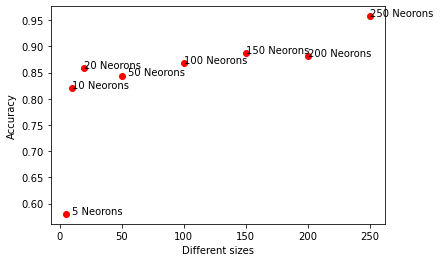

<Figure size 432x288 with 0 Axes>

In [592]:
#plt.axis([5,10,20,50,100,150,200,250])
plt.ylabel("Accuracy")
plt.xlabel("Different sizes")
plt.text(5+5,accuracies_scipy[0],"5 Neorons")
plt.text(10,accuracies_scipy[1],'10 Neorons')
plt.text(20,accuracies_scipy[2],'20 Neorons')
plt.text(50+5,accuracies_scipy[3],'50 Neorons')
plt.text(100,accuracies_scipy[4],'100 Neorons')
plt.text(150,accuracies_scipy[5],'150 Neorons')
plt.text(200,accuracies_scipy[6],'200 Neorons')
plt.text(250,accuracies_scipy[7],'250 Neorons')
plt.plot([5,10,20,50,100,150,200,250],accuracies_scipy,'ro')
plt.show()

In [593]:
test_accuracies_scipy = []
for network in diff_networks_accuracy_score_test_dataset_scipy:
    test_accuracies_scipy.append(diff_networks_accuracy_score_test_dataset_scipy[network])
test_accuracies_scipy

[0.25471698113207547,
 0.3490566037735849,
 0.3490566037735849,
 0.33490566037735847,
 0.3632075471698113,
 0.32547169811320753,
 0.3490566037735849,
 0.29245283018867924]

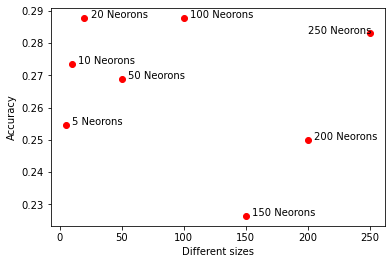

<Figure size 432x288 with 0 Axes>

In [594]:
plt.ylabel("Accuracy")
plt.xlabel("Different sizes")
plt.text(5+5,test_accuracies[0],"5 Neorons")
plt.text(10+5,test_accuracies[1],'10 Neorons')
plt.text(20+5,test_accuracies[2],'20 Neorons')
plt.text(50+5,test_accuracies[3],'50 Neorons')
plt.text(100+5,test_accuracies[4],'100 Neorons')
plt.text(150+5,test_accuracies[5],'150 Neorons')
plt.text(200+5,test_accuracies[6],'200 Neorons')
plt.text(250-50,test_accuracies[7],'250 Neorons')
plt.plot([5,10,20,50,100,150,200,250],test_accuracies,'ro')
plt.show()
plt.savefig('test.png')

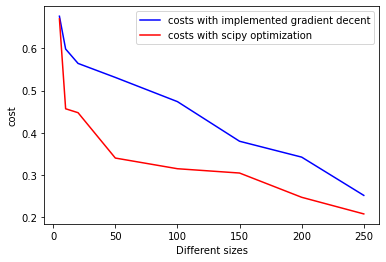

In [599]:
plt.ylabel("cost")
plt.xlabel("Different sizes")
plt.plot([5,10,20,50,100,150,200,250],costs,'b')
plt.plot([5,10,20,50,100,150,200,250],scipy_costs,'r')
plt.legend(['costs with implemented gradient decent','costs with scipy optimization'])
plt.show()

In [ ]:
for network in diff_hidden_layers_parameters_scipy:
    filename = network
    outfile = open(filename,'wb')
    pickle.dump(diff_hidden_layers_parameters_scipy[network],outfile)
    outfile.close()